# Ejemplo de notebook Jupyter

## 1. Cargar los datos

In [8]:
# Cargar las biblioteca Pandas con el alias 'pd’
# Cargar las biblioteca Matplotlib con el alias ‘plt’
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

En este notebook se utilizará la gráfica del porcentaje de población con desorden en salud mental, de 1990 a 2019, en México. 
*Fuente:* https://ourworldindata.org/mental-health
![Share of population with mental health disorders, 1990 to 2019](figures/mental-health.png) 

En este notebook se utilizará la gráfica del porcentaje de población con desorden en salud mental, de 1990 a 2019, en México. 
*Fuente:* https://ourworldindata.org/mental-health
<iframe src="https://ourworldindata.org/grapher/share-with-mental-and-substance-disorders?tab=chart&time=earliest..2019&country=~MEX" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>

In [3]:
# Leer datos del archivo datos.csv
data = pd.read_csv('data/datos.csv')

In [5]:
# Vista previa de las primeras 5 líneas de los datos cargados
print(data.head ())
print(data.columns)

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                              16.66                            
1                                              16.77                            
2                                              16.87                            
3                                              16.99                            
4                                              17.11                            
Index(['Entity', 'Code', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')


In [6]:
# Limpieza de datos
countryMask = data['Entity'] == 'Mexico'
df = data[countryMask][['Year','Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)']]
df.rename(columns={'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)':'Percentage'},inplace=True)
print(df.head())

      Year  Percentage
3602  1990       10.96
3603  1991       10.98
3604  1992       11.01
3605  1993       11.03
3606  1994       11.05


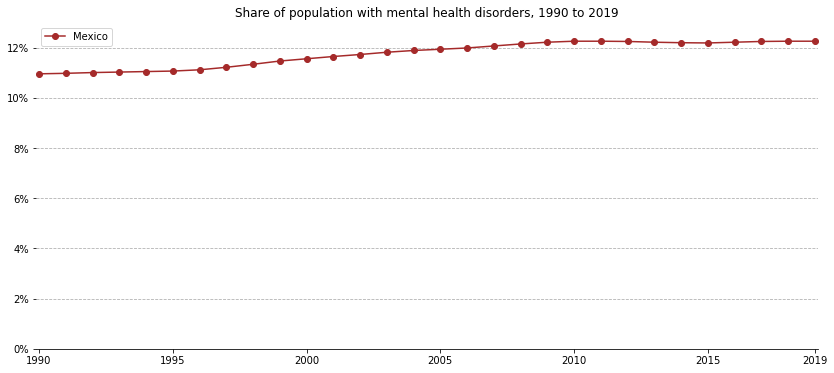

In [85]:
#Graficamos las variables
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df['Year'],df['Percentage'],color='brown',marker='o',label='Mexico')

ax.set_title('Share of population with mental health disorders, 1990 to 2019')

## Eje Y
ax.set_ylim(0,13)
ax.set_yticks(np.arange(0,14,2))
vals = ax.get_yticks()/100
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

## Eje X
ax.set_xlim(1989.9,2019.1)
years = np.arange(1990,2020,5).tolist()
years.append(2019)
ax.set_xticks(years)

## Detalles de grafica
ax.grid(linestyle='--',axis='y')
ax.spines[['top','left','right']].set_visible(False)

plt.legend()
plt.show()